# Schedule TPC-DS 100 Descriptor

This notebook contains work pertatining to pattern learning / identification for a database workload schedule. It contains descriptors of the available data through plot visualizations, so as to better understand which resources play a part into reflecting underlying workloads. This notebook is one of four, which individually analyze four distinct datasets:

* __REP_HIST_SNAPSHOT__
* REP_HIST_SYSMETRIC_SUMMARY
* REP_HIST_SYSSTAT
* REP_VSQL_PLAN

## Data Preprocessing

### Module Installation and Importing Libraries

In [5]:
# Module Import
import pandas as pd
print(pd.__version__)
import numpy as np
print(np.__version__)
import matplotlib.pyplot as plt
import csv

0.23.4
1.15.4


### Configuration Cell

Tweak parametric changes from this cell to influence outcome of experiment. 

* tpcds - Schema upon which to operate test.
* nrows - Number of rows to read from csv file.
* dtype - Pandas type inferring when opening CSV file.

In [6]:
tpcds='TPCDS100'
nrows=None
dtype={'SNAP_ID':int}

### Read data from file into Pandas Dataframes

Open CSV files, and prettify feature column names by removing non-needed characters.

In [7]:
# Root path
#root_dir = 'C:/Users/gabriel.sammut/University/Data_ICS5200/Schedule/' + tpcds
root_dir = 'D:/Projects/Datagenerated_ICS5200/Schedule/' + tpcds

# Open Data
rep_hist_snapshot_path = root_dir + '/rep_hist_snapshot.csv'
rep_hist_snapshot_df = pd.read_csv(rep_hist_snapshot_path,
                                   nrows=nrows,
                                   dtype=dtype,
                                   error_bad_lines=False,
                                   engine='python', 
                                   encoding='utf-8')

def prettify_header(headers):
    """
    Cleans header list from unwated character strings
    """
    header_list = []
    [header_list.append(header.replace("(","").replace(")","").replace("'","").replace(",","")) for header in headers]
    return header_list

rep_hist_snapshot_headers = prettify_header(rep_hist_snapshot_df.columns.values)
rep_hist_snapshot_df.columns =rep_hist_snapshot_headers
# Replace original headers with a prettified version of the same column list
# rep_hist_snapshot_df = pd.read_csv(rep_hist_snapshot_path, 
#                                    names=rep_hist_snapshot_headers,
#                                    nrows=nrows,
#                                    dtype=dtype,
#                                    error_bad_lines=False,
#                                    engine='python', 
#                                    encoding='utf-8')

rep_hist_snapshot_df.drop(rep_hist_snapshot_df.index[0],inplace=True)

print(rep_hist_snapshot_df.head())

Skipping line 1133196: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead


   SNAP_ID        DBID  INSTANCE_NUMBER         SQL_ID  PLAN_HASH_VALUE  \
1    95045  2634225673                1  05s9358mm6vrr                0   
2    95045  2634225673                1  0t9xqgg9n3yws       1206999729   
3    95045  2634225673                1  0w26sk6t6gq98       1388734953   
4    95045  2634225673                1  13ys8ux8xvrbm                0   
5    95045  2634225673                1  1gfaj4z5hn1kf       1110520934   

   OPTIMIZER_COST OPTIMIZER_MODE  OPTIMIZER_ENV_HASH_VALUE  SHARABLE_MEM  \
1             0.0         CHOOSE                2075687385         23679   
2             2.0       ALL_ROWS                2537082850         94373   
3             2.0       ALL_ROWS                1189962988         23460   
4             1.0       ALL_ROWS                2537082850        114891   
5             3.0         CHOOSE                3316887484         44952   

   LOADED_VERSIONS      ...        \
1                1      ...         
2                1

### Checking for NaN Values

Checking dataframes for potential missing values/data:

In [8]:
def get_na_columns(df):
    """
    Return columns which consist of NAN values
    """
    na_list = []
    for head in df.columns:
        if df[head].isnull().values.any():
            na_list.append(head)
    return na_list

print("Table REP_HIST_SNAPSHOT: " + str(get_na_columns(df=rep_hist_snapshot_df)) + "\n\n")

def fill_na(df):
    """
    Replaces NA columns with 0s
    """
    return df.fillna(0)

# Populating NaN values with amount '0'
rep_hist_snapshot_df = fill_na(df=rep_hist_snapshot_df)

Table REP_HIST_SNAPSHOT: ['OPTIMIZER_COST', 'MODULE', 'ACTION', 'SQL_PROFILE', 'BIND_DATA', 'FLAG']




# Dataset Description

All data sources are retrieved from Oracle defined tables/views. These sources have been specifically chosen because they accurately portray a database system under load, across a period of time. Such data sources were polled at regular intervals (60 seconds), and recorded into intermediatery tables for future data mining potential. Each statistic set corresponds to a 'SNAP_ID', which quantifies a particular resource usage at a point in time. 'SNAP_ID' delta equates to 60 seconds. In addition, relavent SQL access plans taken during the workloads execution were also captured.

Statistical calculations:
* Column Names
* Dataframe Row Counts
* Mean (were applicable)
* Standard Dev (were applicable)
* Quartile Percentile
* Min / Max

In [9]:
print('-----------------------------------------------------------')
print('Dataframe Row Count: HIST_SNAPSHOT - ' + str(len(rep_hist_snapshot_df)))
print('-----------------------------------------------------------\n')

print('REP_HIST_SNAPSHOT:')
print(rep_hist_snapshot_df.describe())

rep_hist_snapshot_df['SNAP_ID'] = rep_hist_snapshot_df['SNAP_ID'].astype(int)
min_id = rep_hist_snapshot_df['SNAP_ID'].min()
max_id = rep_hist_snapshot_df['SNAP_ID'].max()
print('Mininum SNAP_ID [' + str(min_id) + ']')
print('Maximum SNAP_ID [' + str(max_id) + ']')

-----------------------------------------------------------
Dataframe Row Count: HIST_SNAPSHOT - 1133193
-----------------------------------------------------------

REP_HIST_SNAPSHOT:
            SNAP_ID          DBID  INSTANCE_NUMBER  PLAN_HASH_VALUE  \
count  1.133193e+06  1.133193e+06        1133193.0     1.133193e+06   
mean   1.013616e+05  2.634226e+09              1.0     2.046407e+09   
std    3.658986e+03  0.000000e+00              0.0     1.363824e+09   
min    9.504500e+04  2.634226e+09              1.0     0.000000e+00   
25%    9.819600e+04  2.634226e+09              1.0     8.818421e+08   
50%    1.013340e+05  2.634226e+09              1.0     2.035255e+09   
75%    1.045230e+05  2.634226e+09              1.0     3.314469e+09   
max    1.077220e+05  2.634226e+09              1.0     4.294102e+09   

       OPTIMIZER_COST  OPTIMIZER_ENV_HASH_VALUE  SHARABLE_MEM  \
count    1.133193e+06              1.133193e+06  1.133193e+06   
mean     5.742972e+07              2.430574e+

# Dataset Extraction

The above datasets were extracted from the following user defined tables:
* REP_HIST_SNAPSHOT

Each table corresponds to an Oracle defined table, whose sole function is to offload data from Oracle defined tables (which tend to have a retention period) into a user defined table. Table REP_HIST_SNAPSHOT, REP_HIST_SYSMETRIC_SUMMARY and REP_HIST_SYSSTAT can be joined through the 'SNAP_ID' column. Table REP_VSQL_PLAN can be joined to REP_HIST_SNAPSHOT through the 'SQL_ID' column.

For table REP_HIST_SNAPSHOT, the Oracle history table DBA_HIST_SNAPSHOT (https://docs.oracle.com/cd/B19306_01/server.102/b14237/statviews_3177.htm#REFRN23442) was joined with DBA_HIST_SQLSTAT (https://docs.oracle.com/cd/B13789_01/server.101/b10755/statviews_2158.htm). This gives us a snapshot with information regarding oracle's workload repository. The specific query used can be found further below.

``` sql
/*REP_HIST_SNAPSHOT*/
select dhsql.*,
       dhsnap.startup_time,
       dhsnap.begin_interval_time,
       dhsnap.end_interval_time,
       dhsnap.flush_elapsed,
       dhsnap.snap_level,
       dhsnap.error_count,
       dhsnap.snap_flag,
       dhsnap.snap_timezone,
       dhsnap.con_id
from dba_hist_sqlstat dhsql,
     dba_hist_snapshot dhsnap
where dhsql.snap_id = dhsnap.snap_id
and dhsql.dbid = dhsnap.dbid
and dhsql.instance_number = dhsnap.instance_number
and dhsnap.snap_id between '544' and '545';
```

# Data Visualization

The following section visualizes each dataset through a number of pictorial graphs, so as to better visualize the underlying load distribution. Visualizations will be composed between a mixture of line graphs, which will denote a resource's usage over time. 

Line graphs will plot a single database resource vs a SNAP_ID. The SNAP_ID is an identifier pertaining to captured database statistics at a single point in time. SNAP_IDs are set to capture resources every single minute of a database's workload.

Pie charts will denote resource / metric distribution for the duration of the workload trace.

In [10]:
class SnapShotVisualization:
    """
    This class is dedicatedto visualizing collected data over a period of snapshot identifiers.
    """
    def __init__(self, table=None, tpc_type=None, df=None):
        """
        Class constructor.
        :param table:    (String) Denotes which table is going to be utilized. Used for plot purposes.
        :param tpc_type: (String) Denotes which tpc type these experimental plots pertain to.
        :param df:       (Pandas) Data matrix.
        :return: None
        """
        self.__table = table
        self.__tpc_type = tpc_type
        self.__df = df
        
    def plot_snapshot_distribution(self, column):
        """
        Plots line graph, based on input column.
        :param column: (String) Denotes feature column to plot against SNAP_ID feature.
        :return: None
        """
        tpc_type = self.__tpc_type.upper()
        table=self.__table.lower()
        df = self.__df
        
        if column is None or tpc_type is None:
            raise ValueError('Parameters were declared incorrectly!')

        # Convert to float
        df['SNAP_ID'] = df['SNAP_ID'].astype(float)
        df[column]=df[column].astype(float)
        start_snap, end_snap = int(df['SNAP_ID'].min()), int(df['SNAP_ID'].max())

        # Sort by order of execute time
        df = df.sort_values(by=['SNAP_ID'])

        # Group by SNAP_ID
        df = df.groupby(['SNAP_ID'])[column].sum()

        fig, ax = plt.subplots()
        df.plot(kind='line', x='SNAP_ID', y=column, ax=ax)
        plt.ylabel(column)
        plt.xlabel('SNAP ID')
        plt.title(tpc_type + ' ' + str(column) + " between " + str(start_snap) + " - " + str(end_snap))
        plt.rcParams['figure.figsize'] = [20, 15]
        plt.show()

    def plot_snapshot_ratios(self, column):
        """
        Plots Pie Chart, based on input column.
        :param column: (String) Denotes feature column to plot against SNAP_ID feature.
        :return: None
        """
        tpc_type = self.__tpc_type.upper()
        table=self.__table.lower()
        df = self.__df
        
        if column is None or tpc_type is None:
            raise ValueError('Parameters were declared incorrectly!')

        df = df.groupby([column])[column].count()

        # Sort by operation counts
        series = pd.Series(df.values, index=df.index, name='series')
        series.plot.pie(figsize=(6, 6))
        #plt.xticks([])
        plt.ylabel(column)
        plt.title(tpc_type + ' ' + str(column) + ' Ratio')
        plt.rcParams['figure.figsize'] = [40, 30]
        plt.legend(bbox_to_anchor=(0.95,0.95))
        plt.show()
        
ssv = SnapShotVisualization(table='rep_hist_snapshot', 
                            tpc_type=tpcds, 
                            df=rep_hist_snapshot_df)

### Optimizer Cost Distribution

Summed cost attributed by the optimizer for a particular snapshot (summed on all recorded child cursors for a particular snap_id). These metrics are retrieved from table REP_HIST_SNAPSHOT (DBA_HIST_SNAPSHOT).

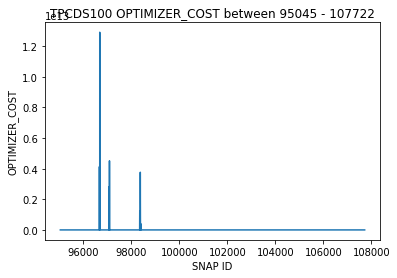

In [11]:
ssv.plot_snapshot_distribution(column="OPTIMIZER_COST")

### Optimizer Mode

Mode under which the SQL statement is executed

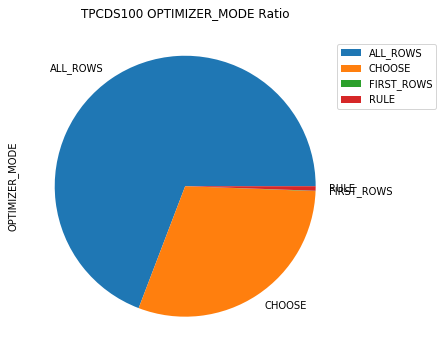

In [12]:
ssv.plot_snapshot_ratios(column="OPTIMIZER_MODE")

### Sharable Memory

Summed amount of shared memory used by the child cursors (in bytes)

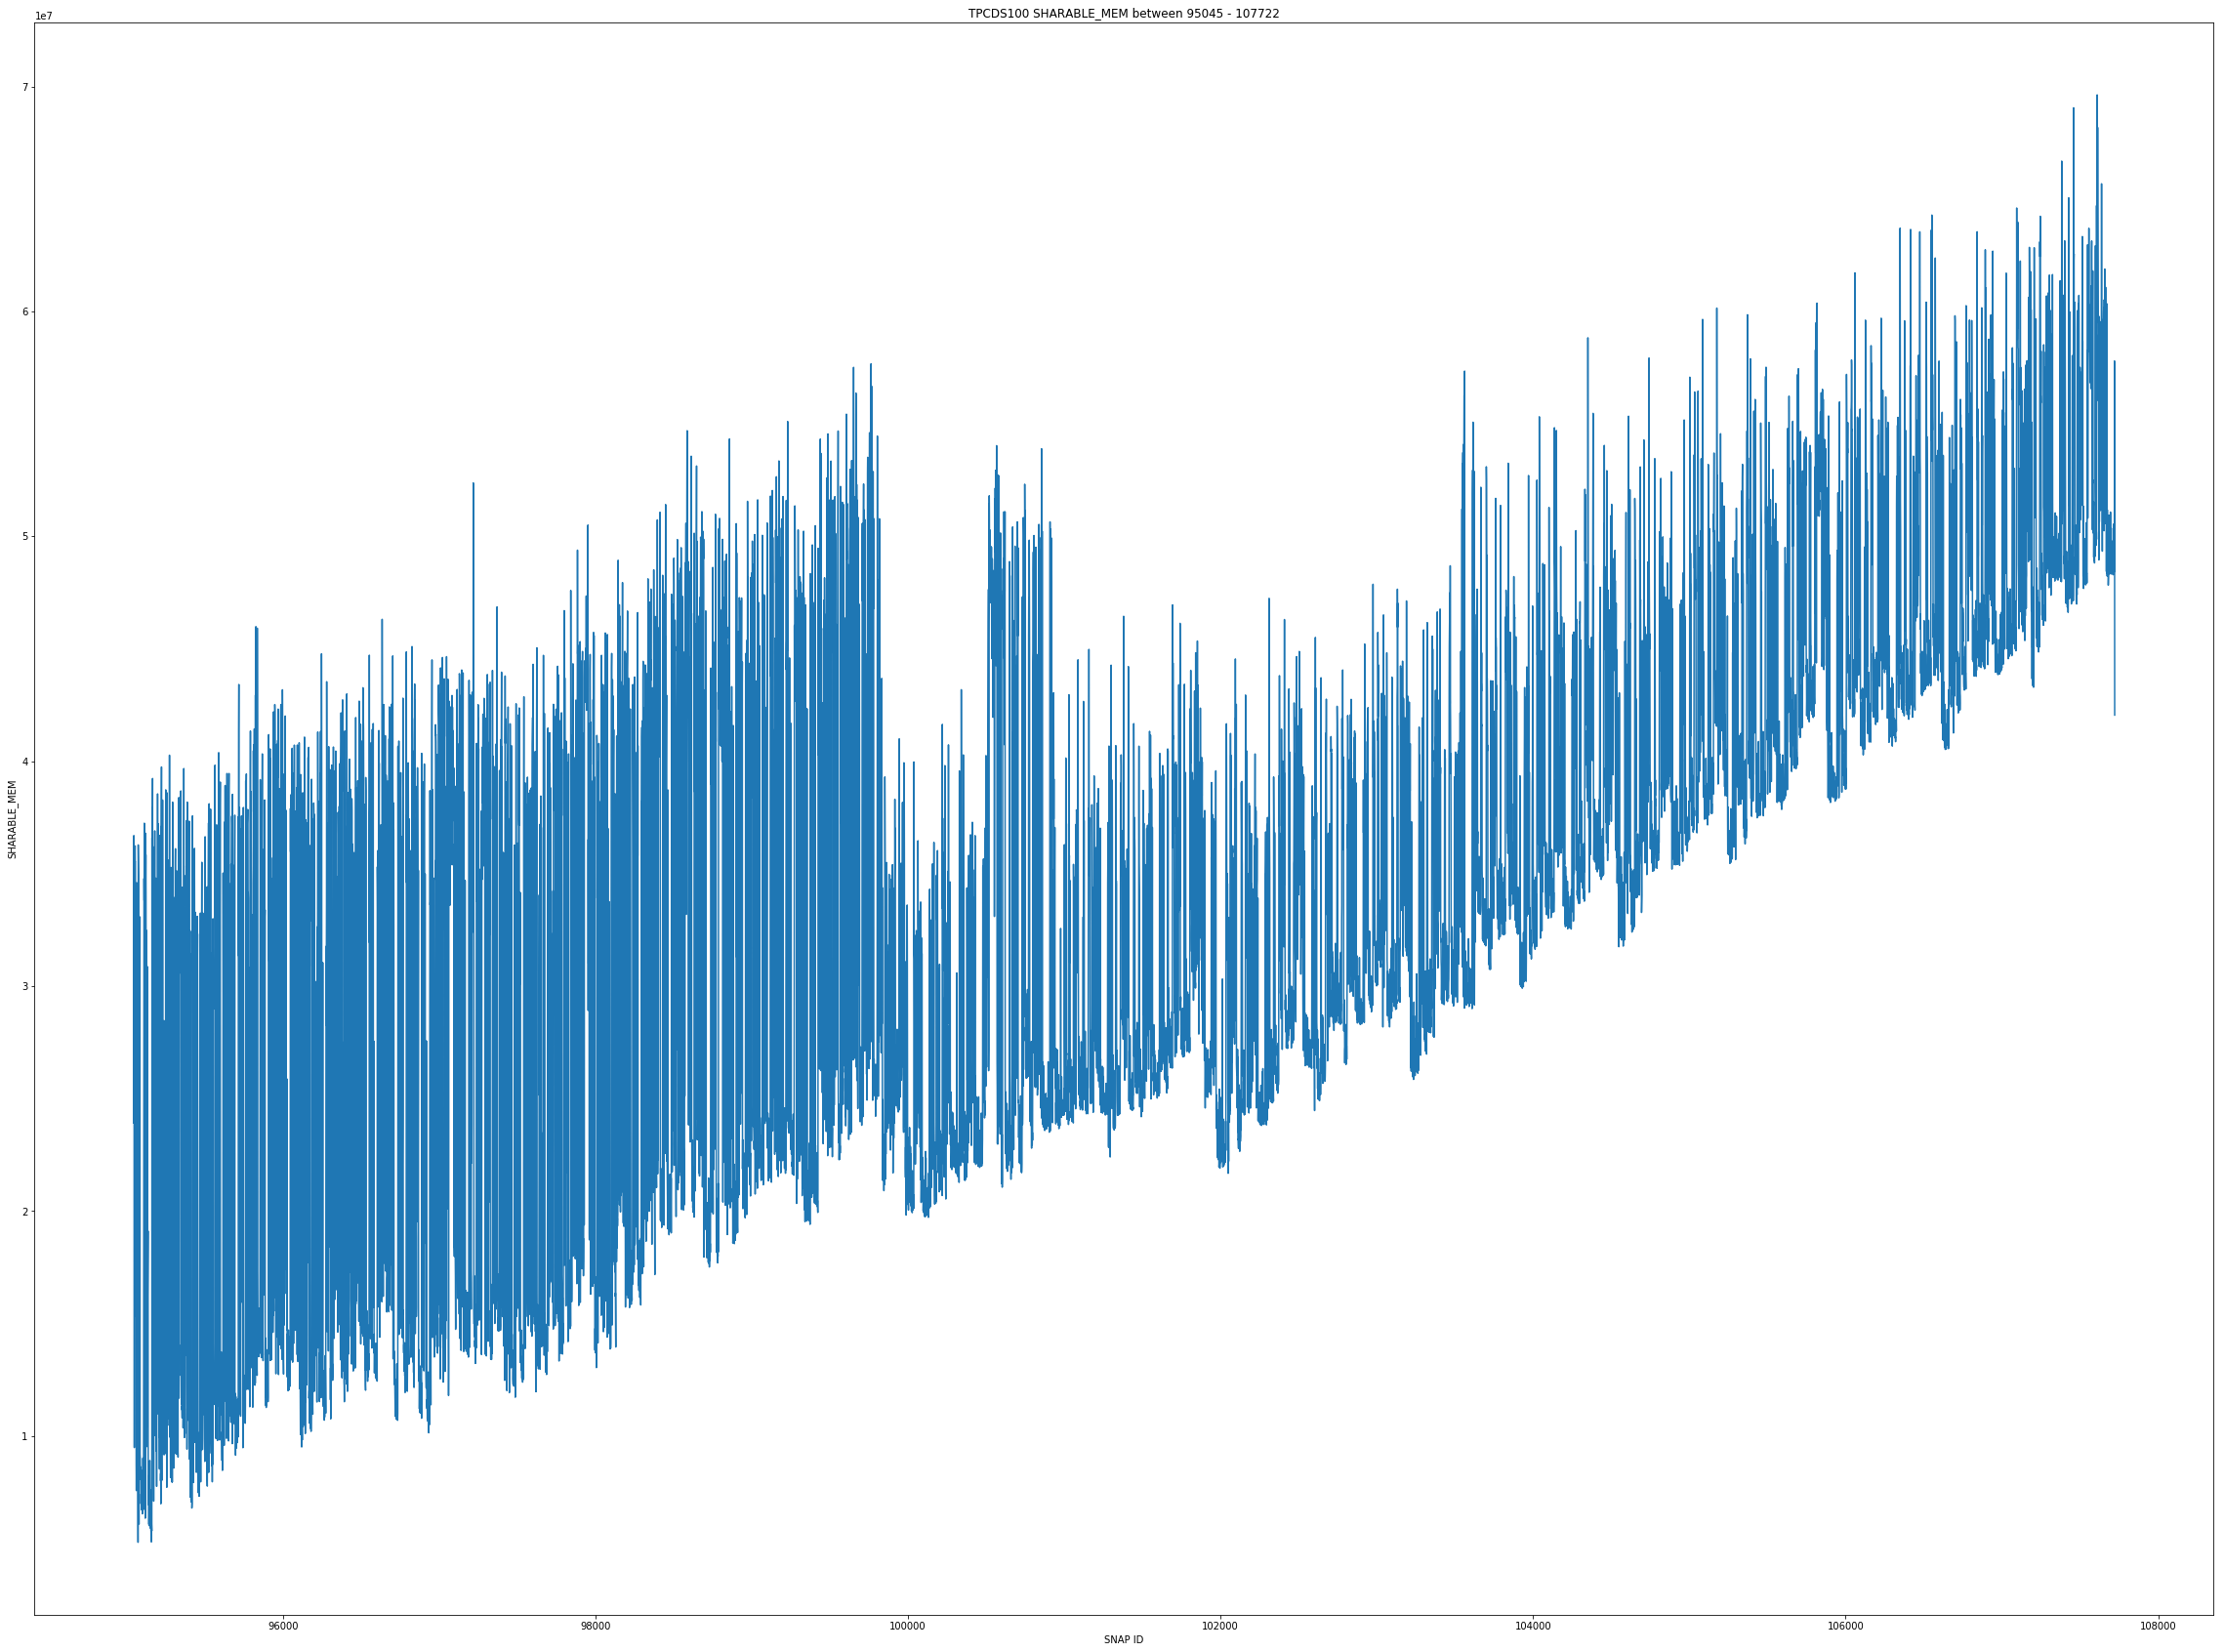

In [13]:
ssv.plot_snapshot_distribution(column="SHARABLE_MEM")

### Parsing Schema Name

Schema ID that was used to originally build the child cursor

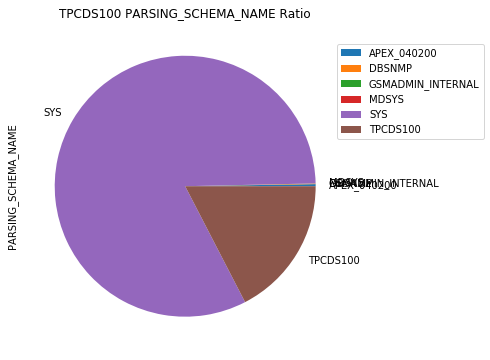

In [14]:
ssv.plot_snapshot_ratios(column="PARSING_SCHEMA_NAME")

### Fetches Delta

Summation of delta number of fetches associated with the SQL statement

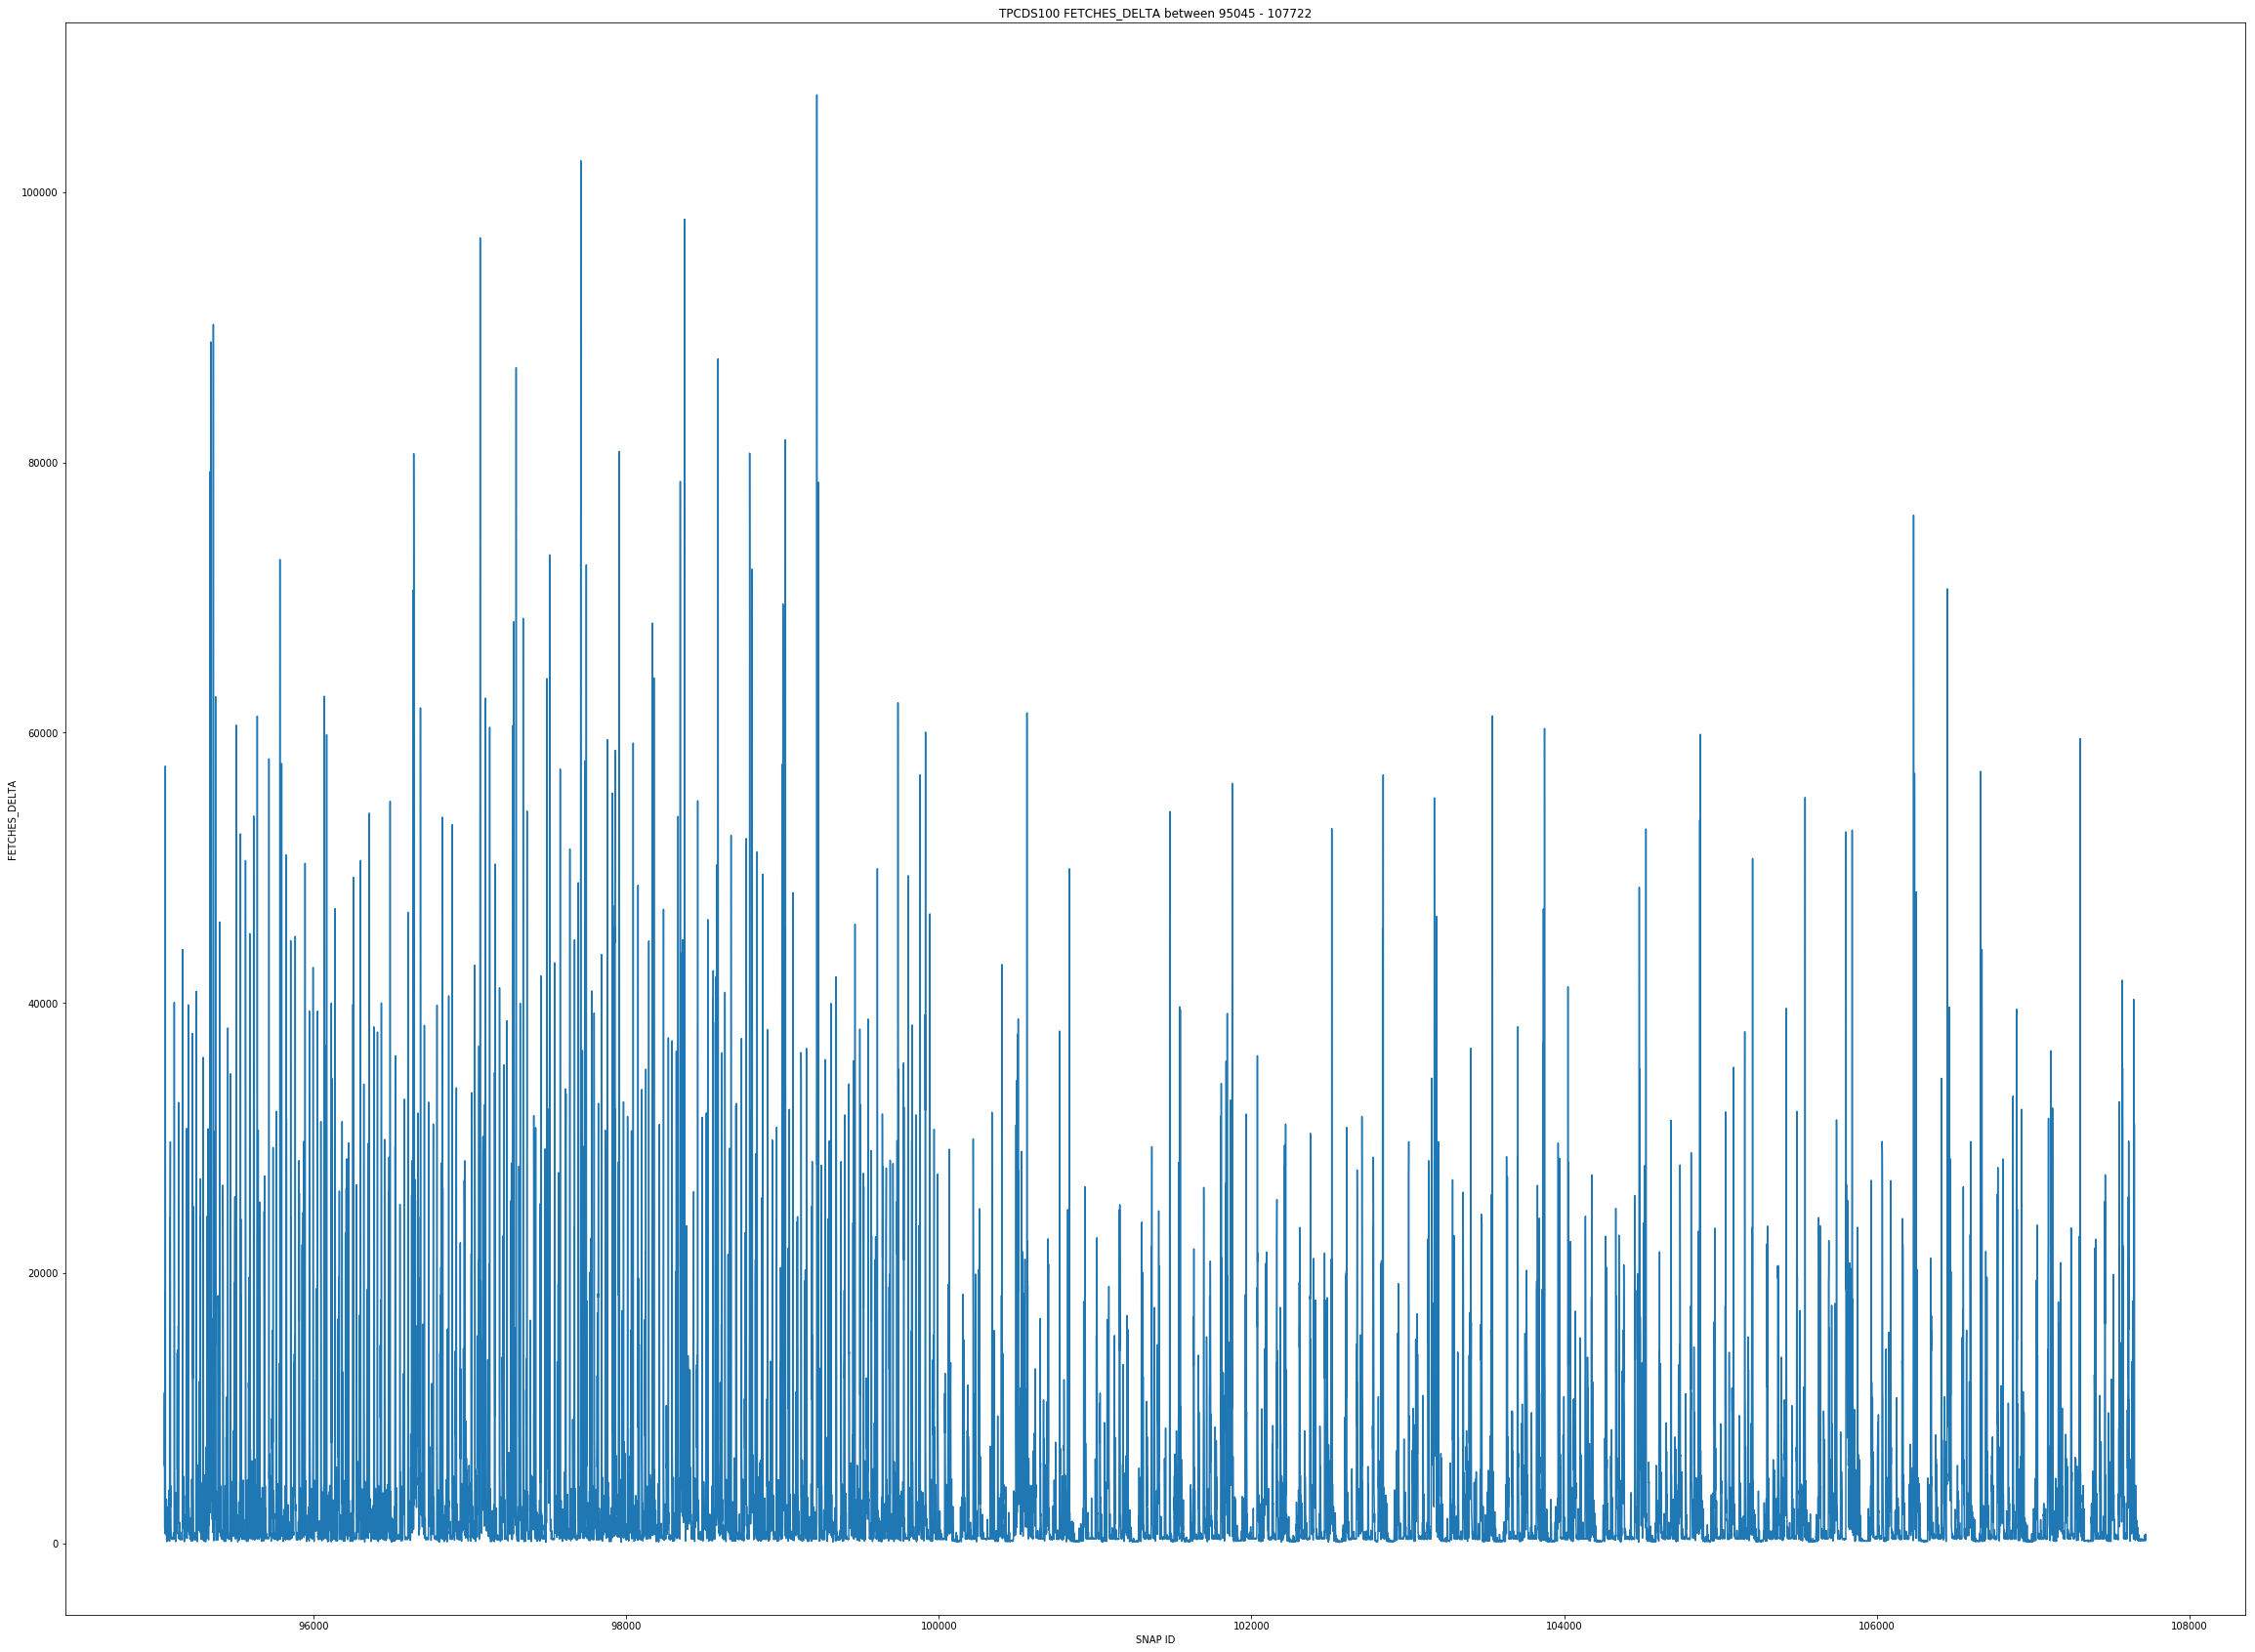

In [15]:
ssv.plot_snapshot_distribution(column="FETCHES_DELTA")

### End Of Fetch Count Delta

Delta number of times this cursor was fully executed since the cursor was brought into the library cache. The value of this statistic is not incremented when the cursor is partially executed, either because it failed during the execution or because only the first few rows produced by this cursor are fetched before the cursor is closed or re-executed.

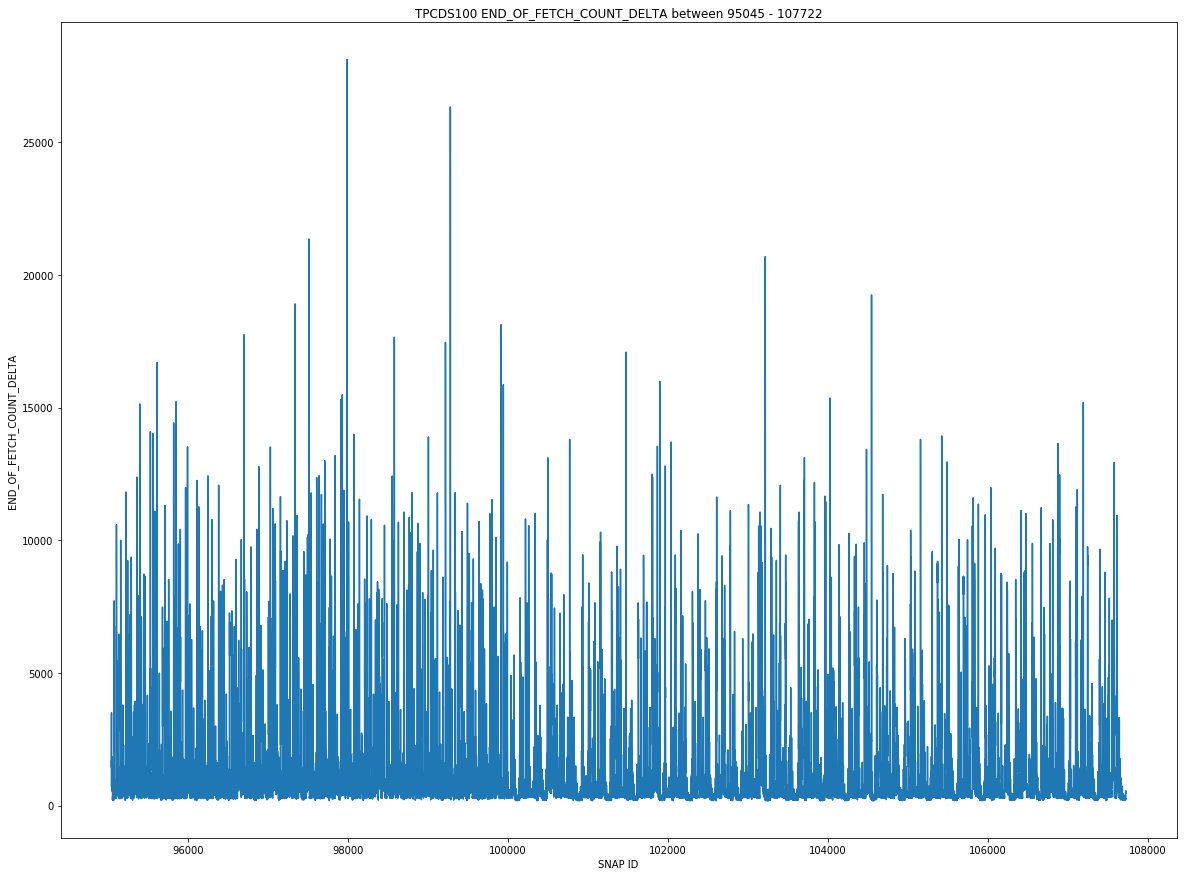

In [16]:
ssv.plot_snapshot_distribution(column="END_OF_FETCH_COUNT_DELTA")

### Sorts Delta

Delta number of sorts that were done for this child cursor

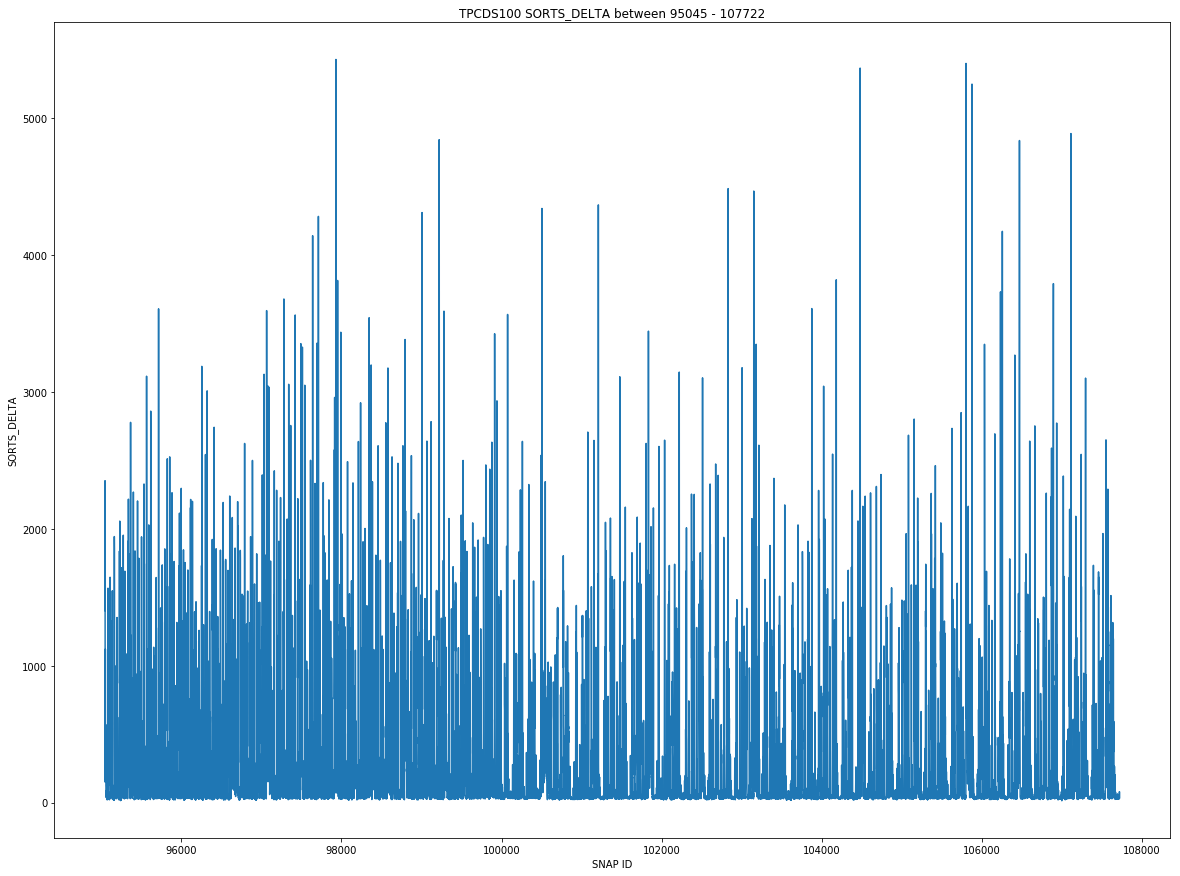

In [17]:
ssv.plot_snapshot_distribution(column="SORTS_DELTA")

### Executions Delta

Delta number of executions that took place on this object since it was brought into the library cache

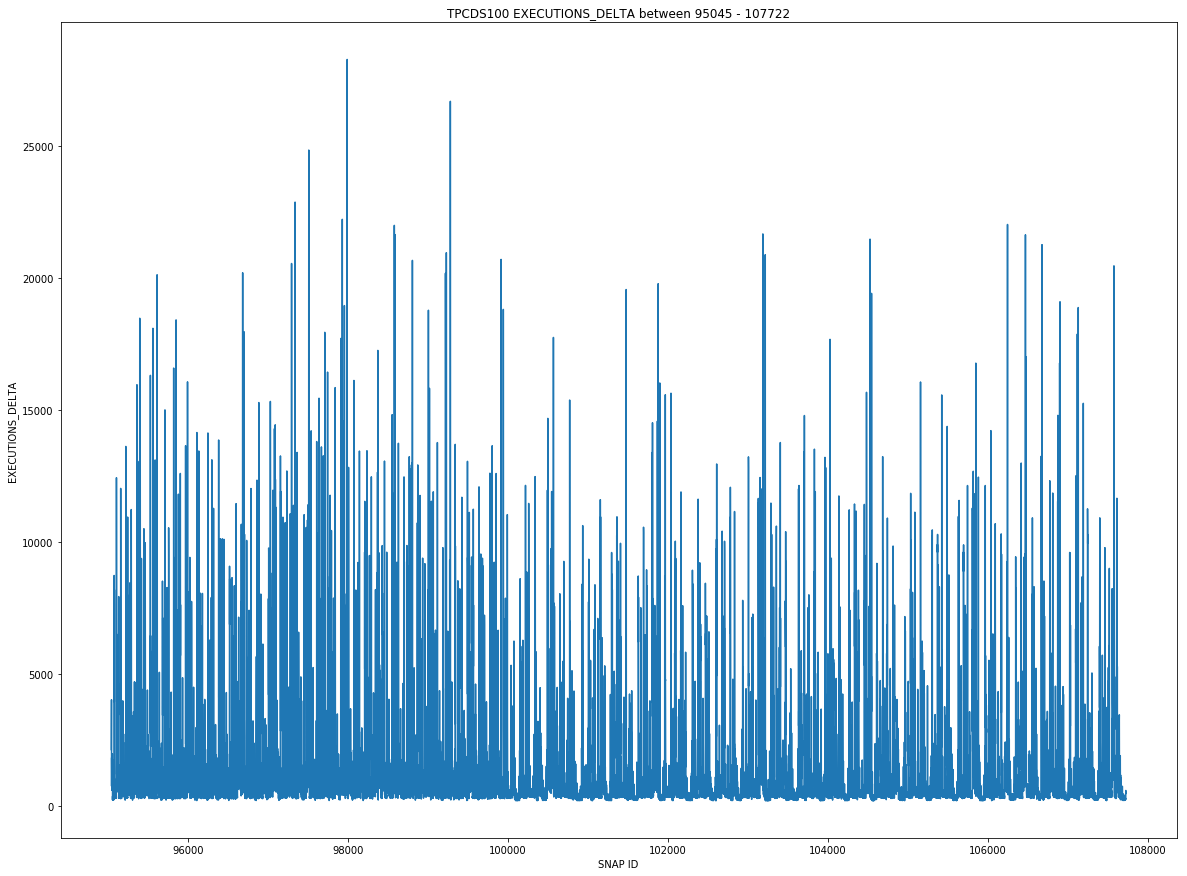

In [18]:
ssv.plot_snapshot_distribution(column="EXECUTIONS_DELTA")

### Loads Delta

Delta number of times the object was either loaded or reloaded

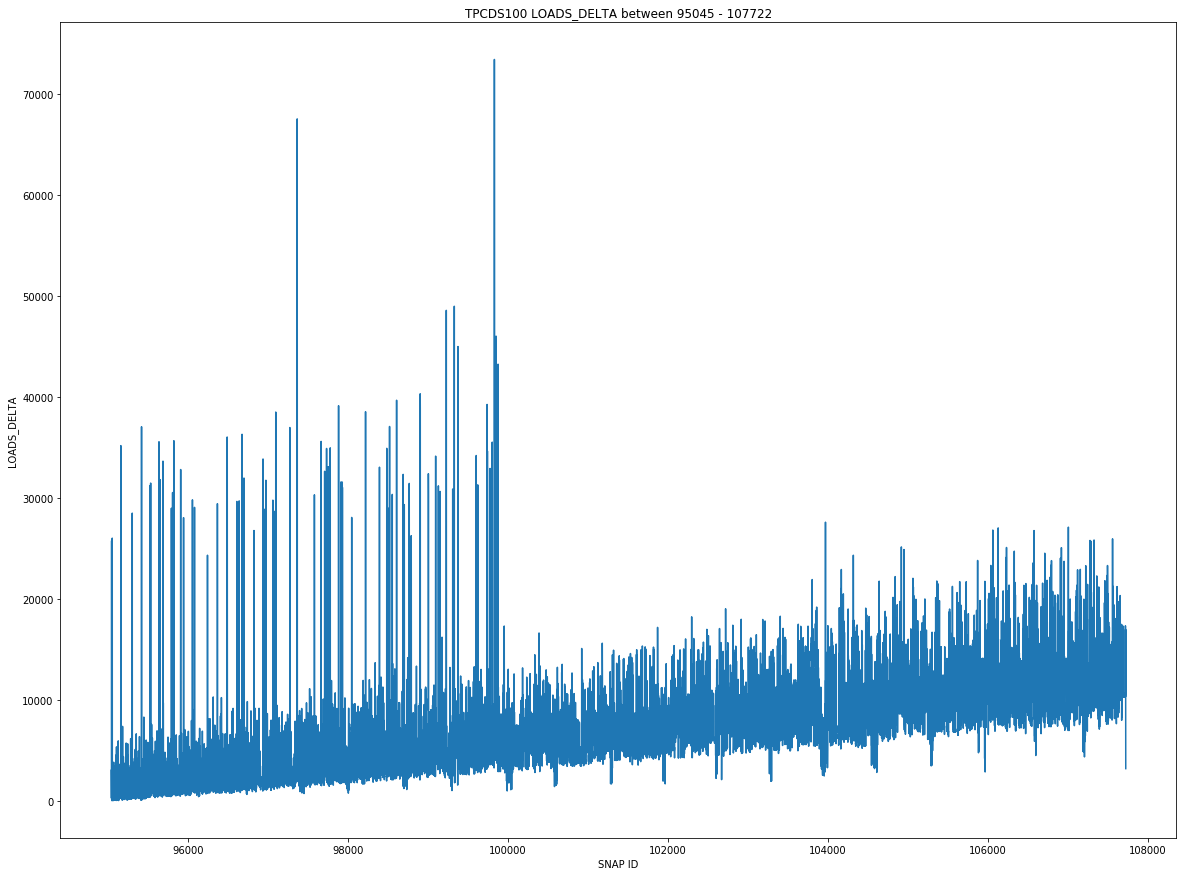

In [19]:
ssv.plot_snapshot_distribution(column="LOADS_DELTA")

### Invalidation Delta

Delta number of times this child cursor has been invalidated

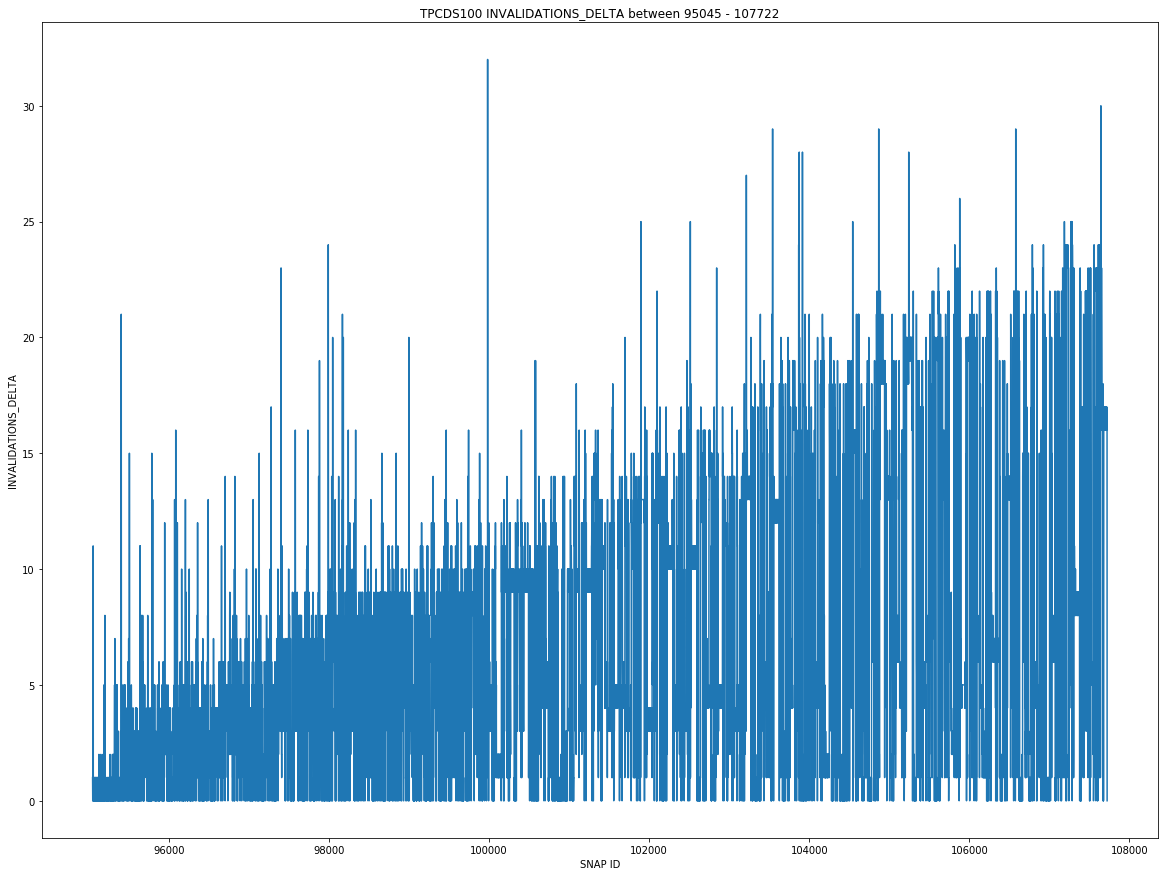

In [20]:
ssv.plot_snapshot_distribution(column="INVALIDATIONS_DELTA")

### Parse Calls Delta

Delta number of parse calls for this child cursor

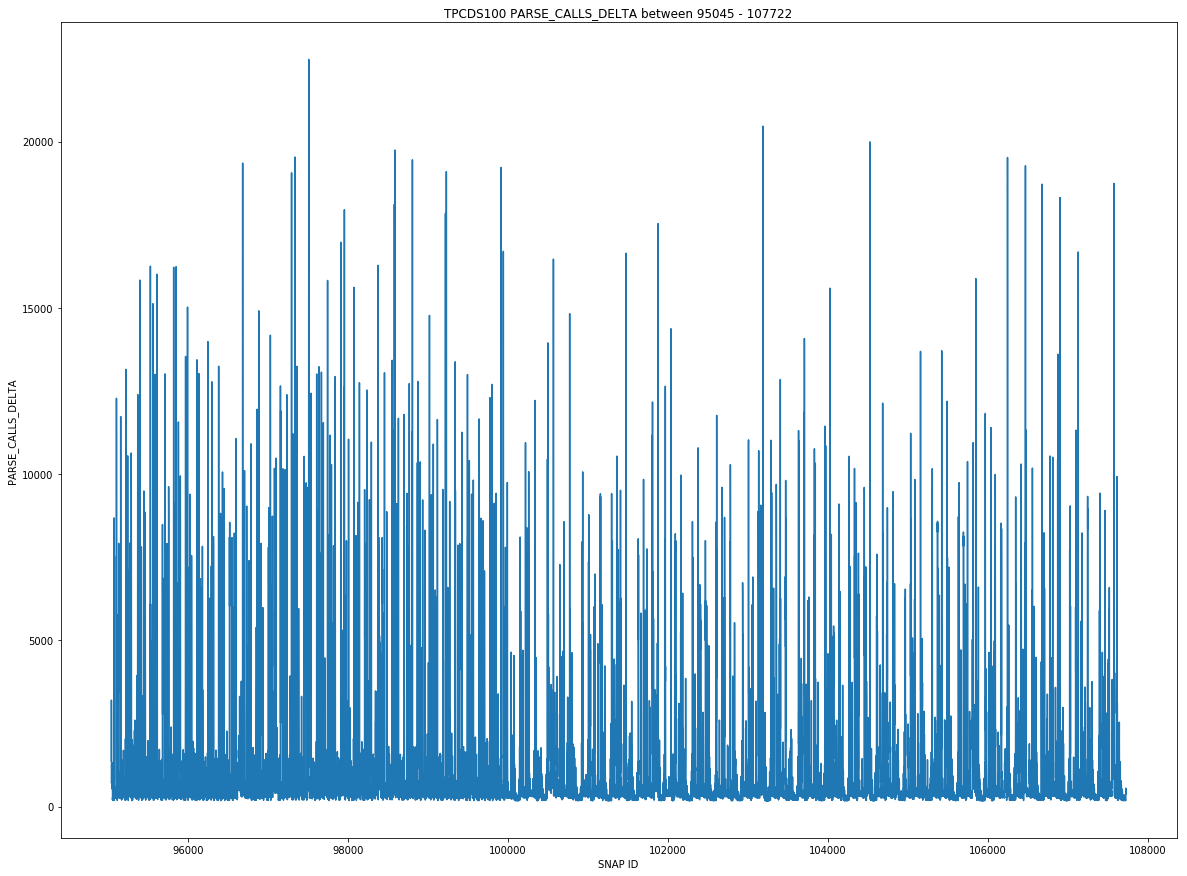

In [21]:
ssv.plot_snapshot_distribution(column="PARSE_CALLS_DELTA")

### Disk Reads Delta

Delta number of disk reads for this child cursor

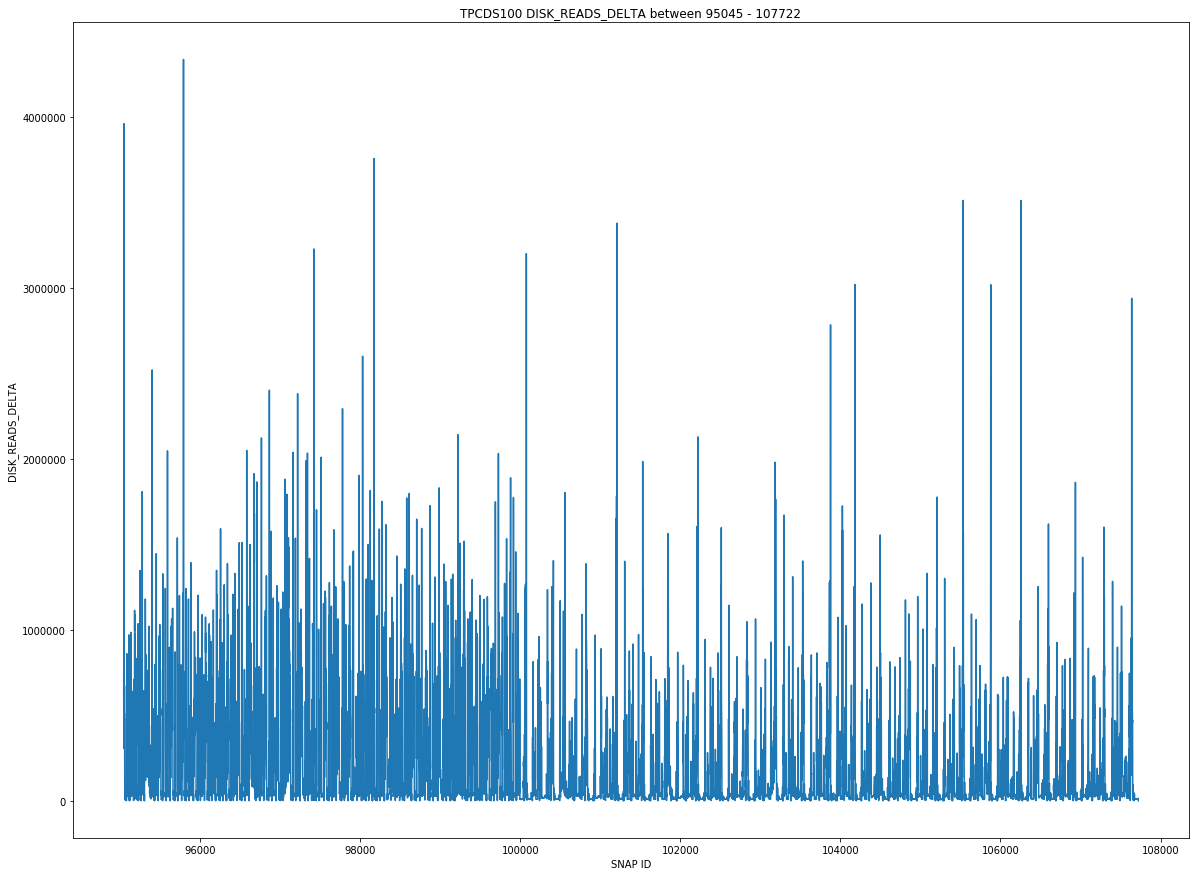

In [22]:
ssv.plot_snapshot_distribution(column="DISK_READS_DELTA")

### Buffer Gets Delta

Delta number of buffer gets for this child cursor

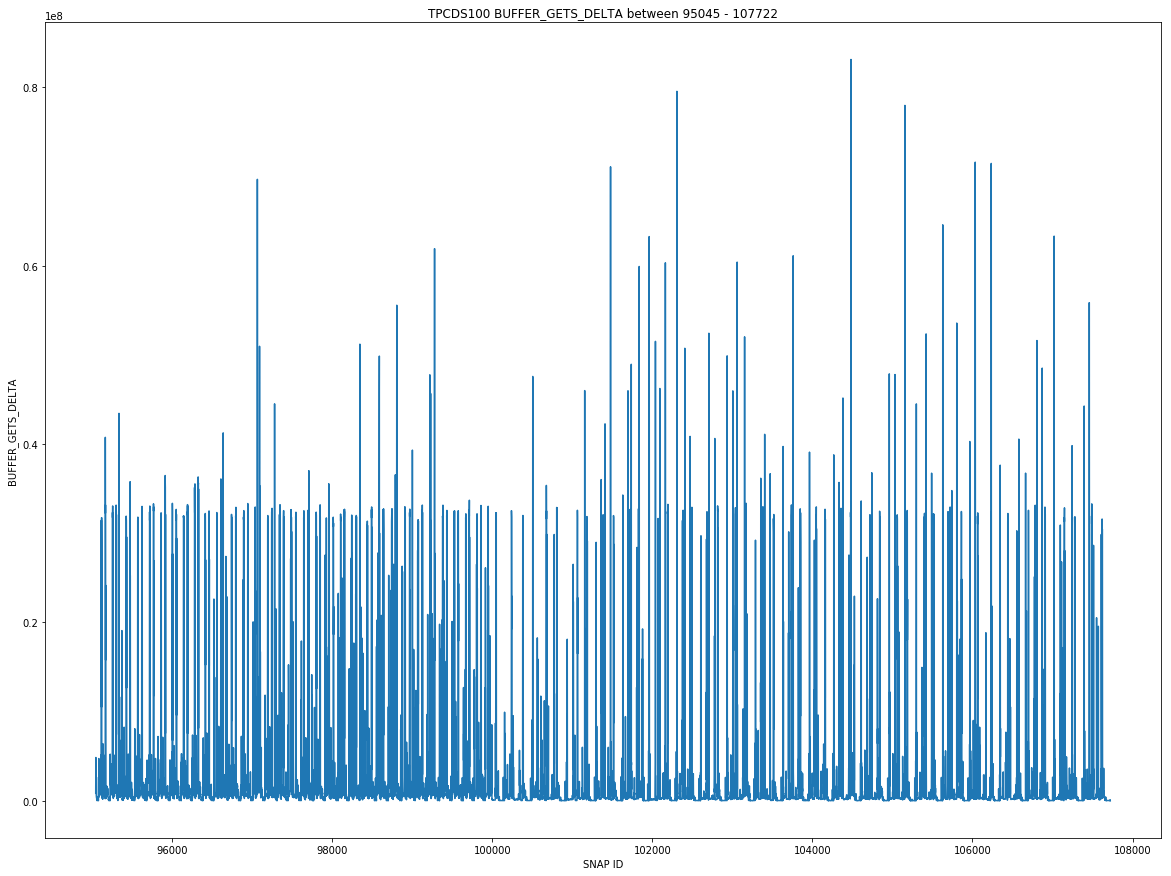

In [23]:
ssv.plot_snapshot_distribution(column="BUFFER_GETS_DELTA")

### Rows Processed Delta

Delta number of rows the parsed SQL statement returns

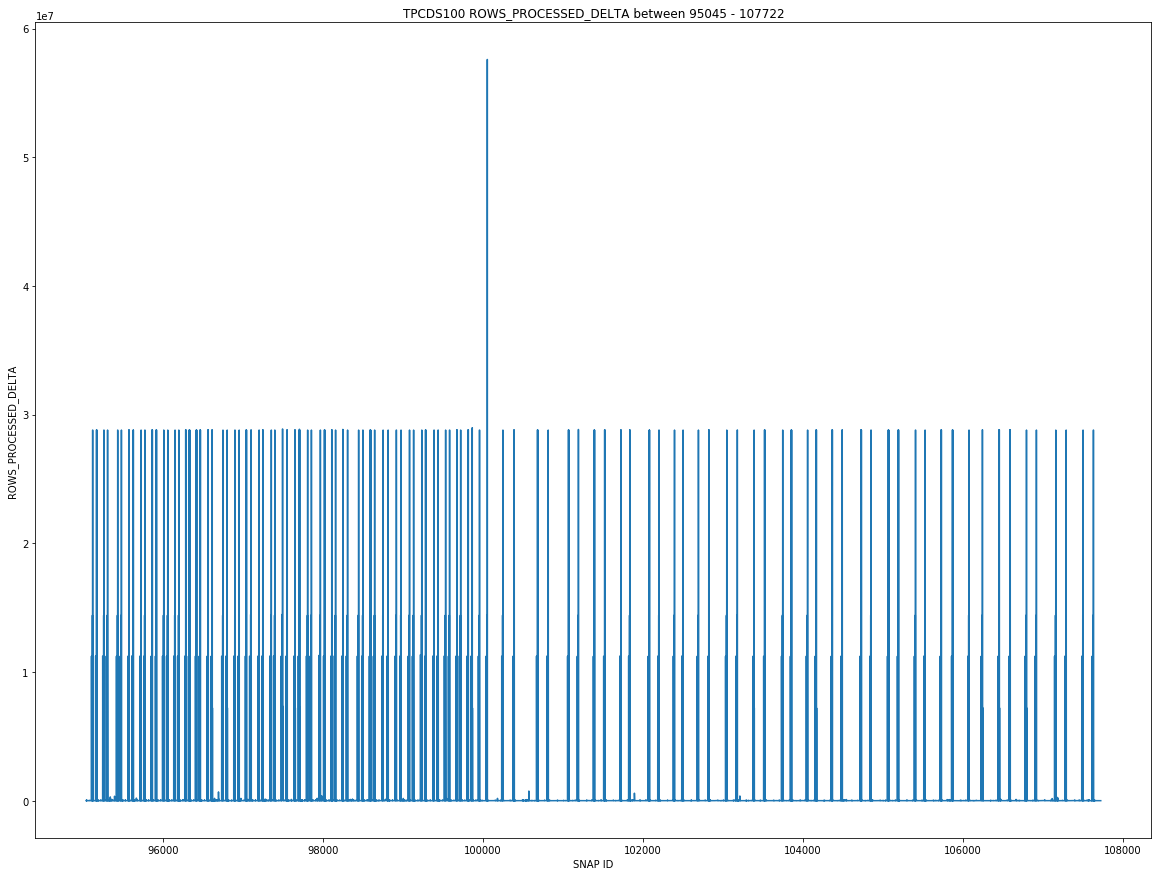

In [24]:
ssv.plot_snapshot_distribution(column="ROWS_PROCESSED_DELTA")

### CPU Time Delta

Delta value of CPU time (in microseconds) used by this cursor for parsing/executing/fetching

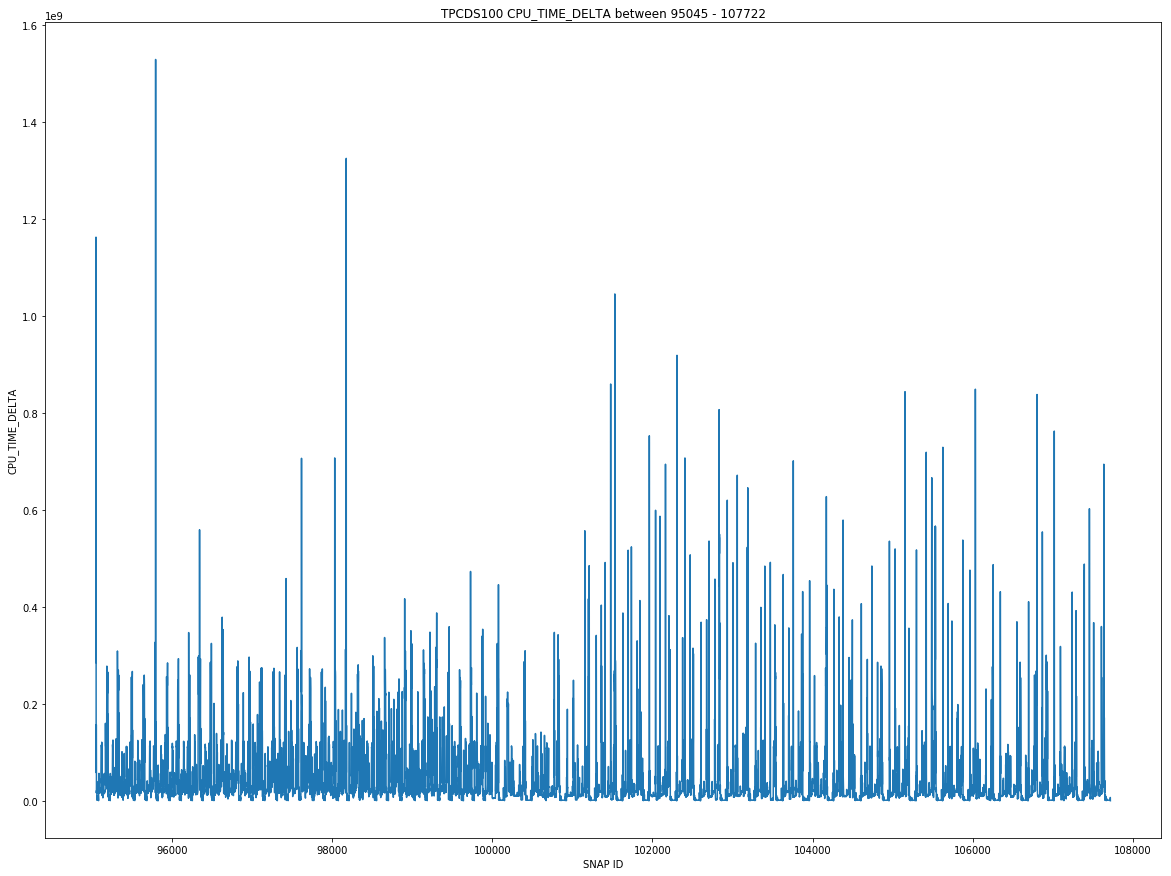

In [25]:
ssv.plot_snapshot_distribution(column="CPU_TIME_DELTA")

### Elapsed Time Delta

Delta value of elapsed time (in microseconds) used by this cursor for parsing/executing/fetching

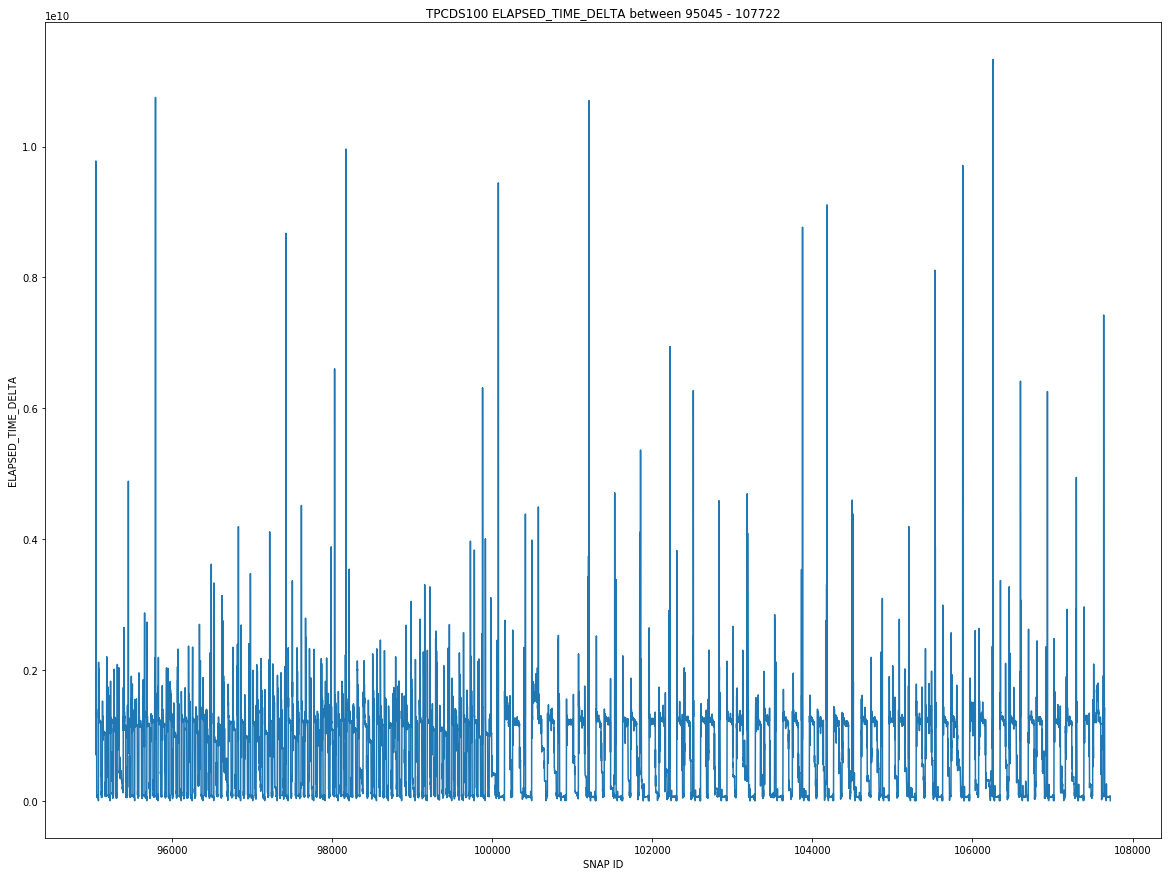

In [26]:
ssv.plot_snapshot_distribution(column="ELAPSED_TIME_DELTA")

### IO Wait Delta

Delta value of user I/O wait time

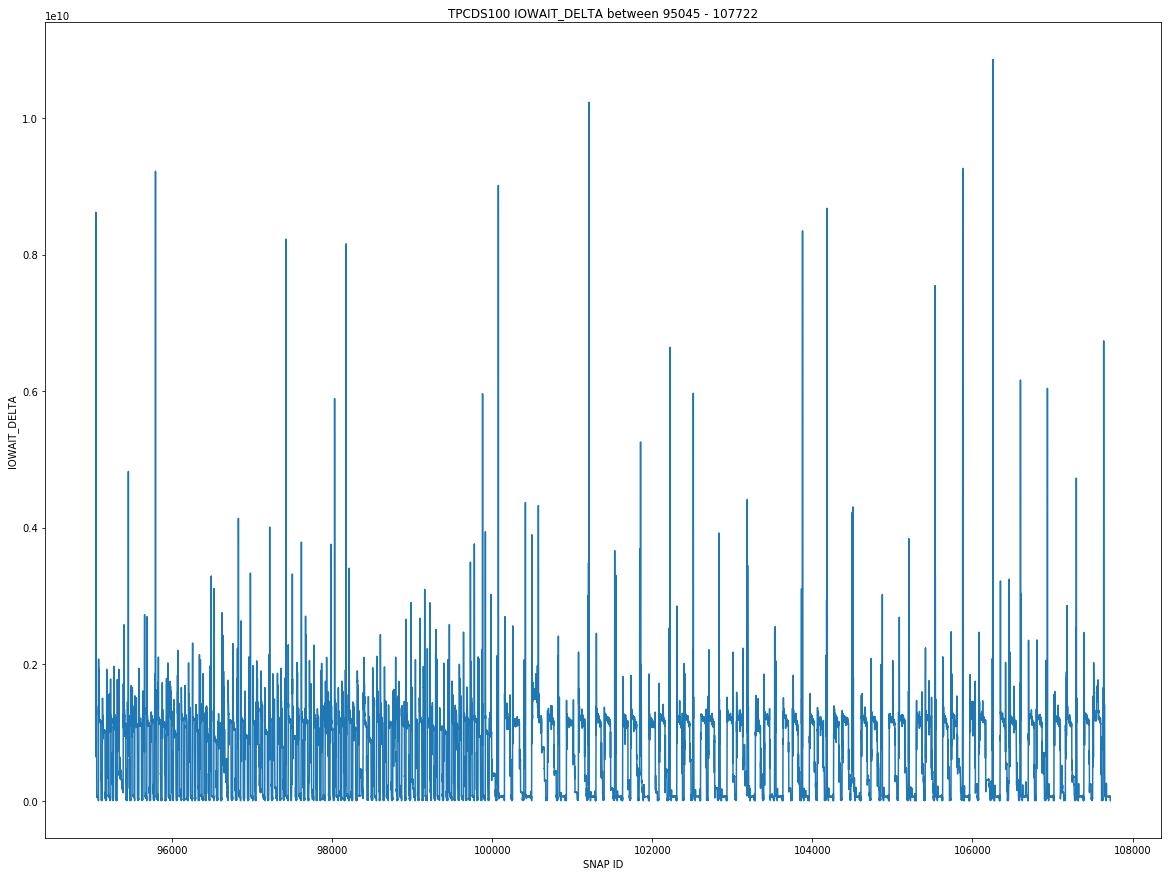

In [27]:
ssv.plot_snapshot_distribution(column="IOWAIT_DELTA")

### Cluster Wait Time

Delta value of cluster wait time

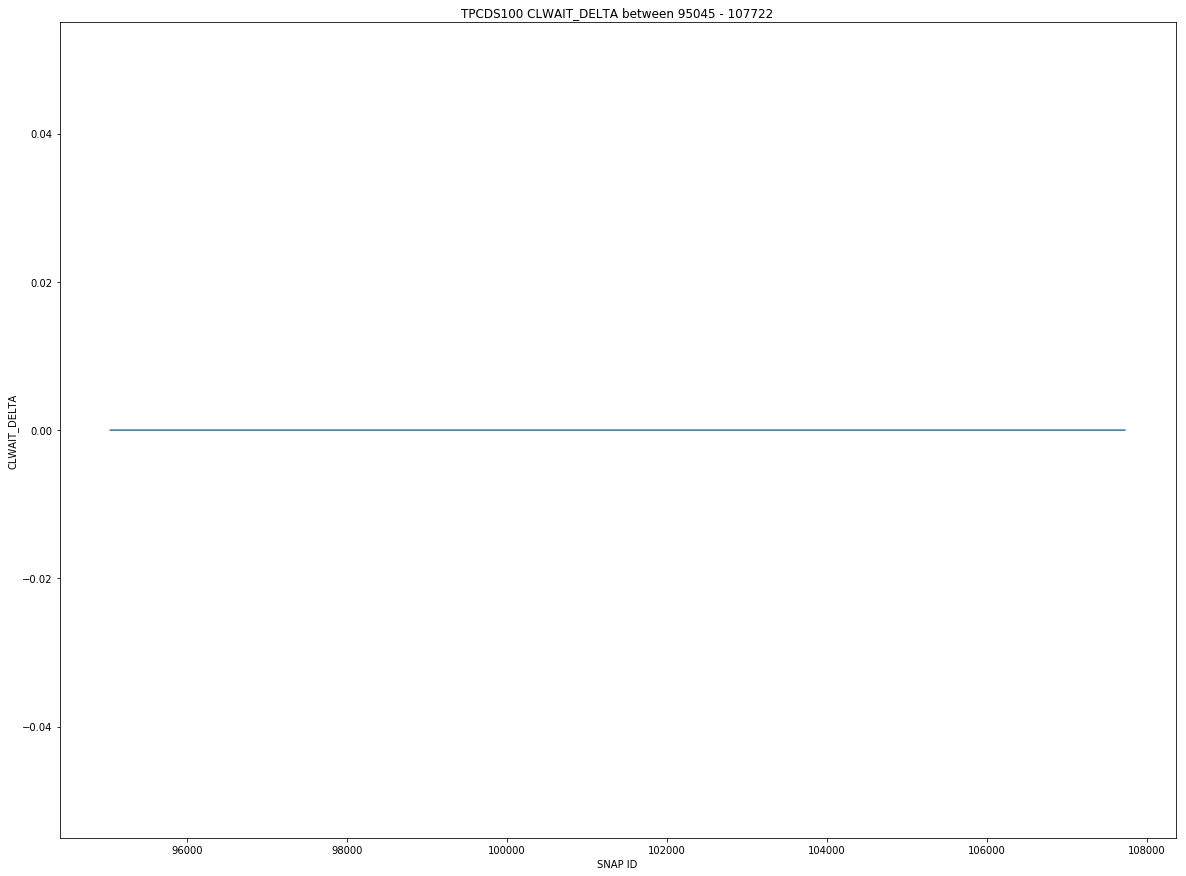

In [28]:
ssv.plot_snapshot_distribution(column="CLWAIT_DELTA")

### APWait Delta

Delta value of application wait time

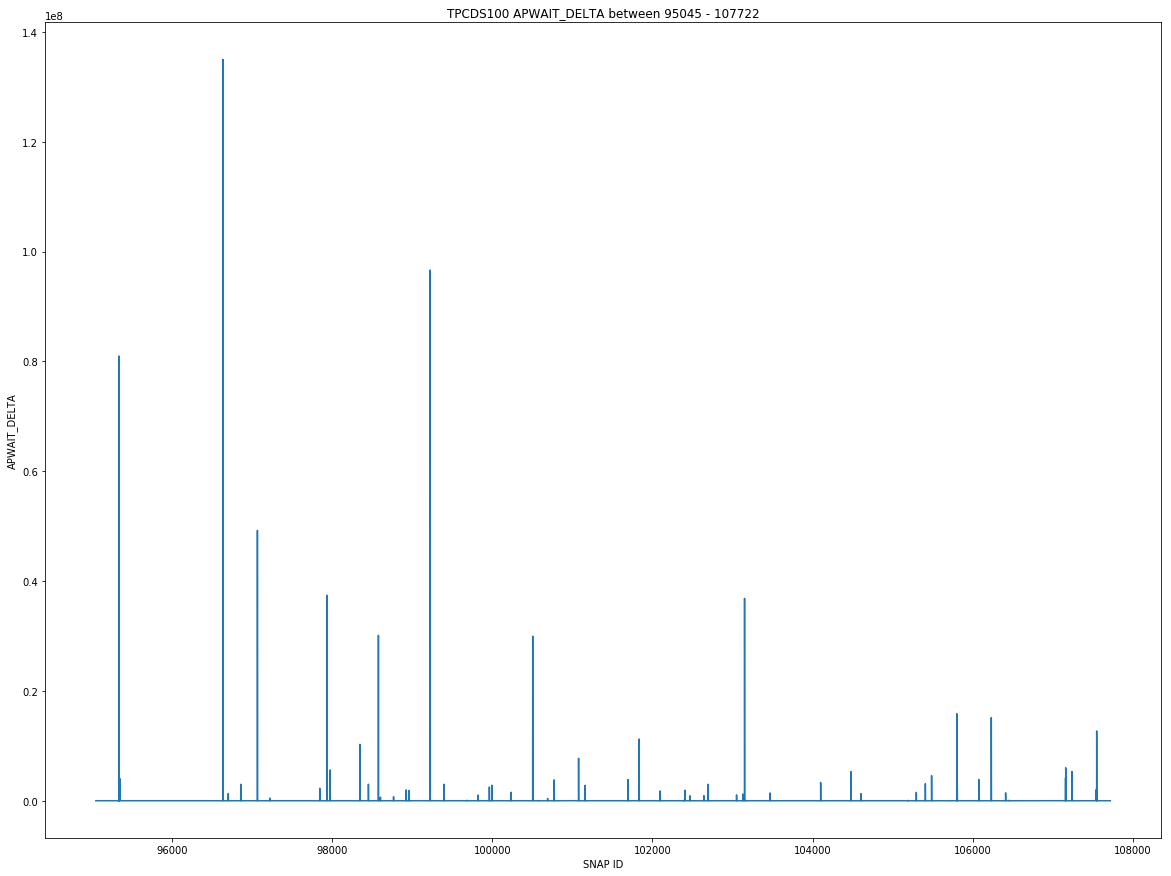

In [29]:
ssv.plot_snapshot_distribution(column="APWAIT_DELTA")

### CCWait Delta

Delta value of concurrency wait time

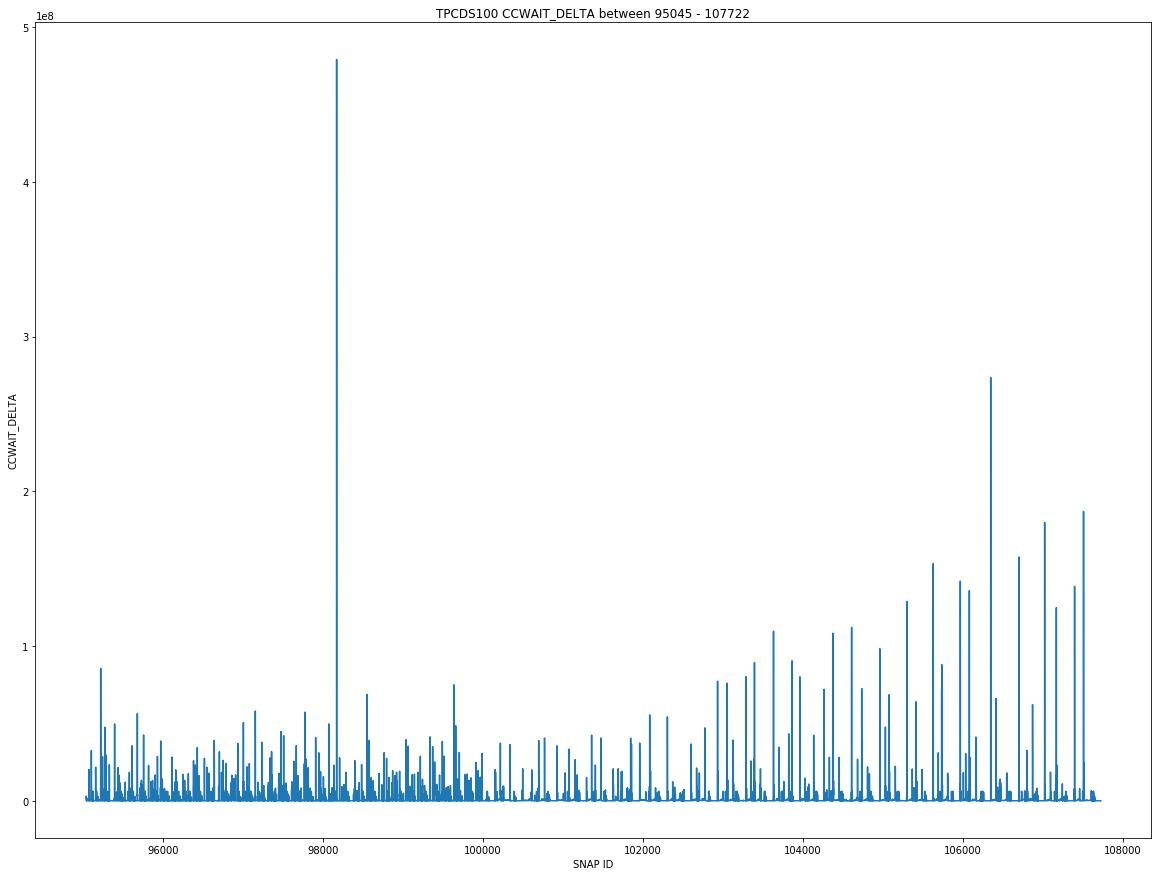

In [30]:
ssv.plot_snapshot_distribution(column="CCWAIT_DELTA")

### Direct Writes Delta

Delta value of direct writes

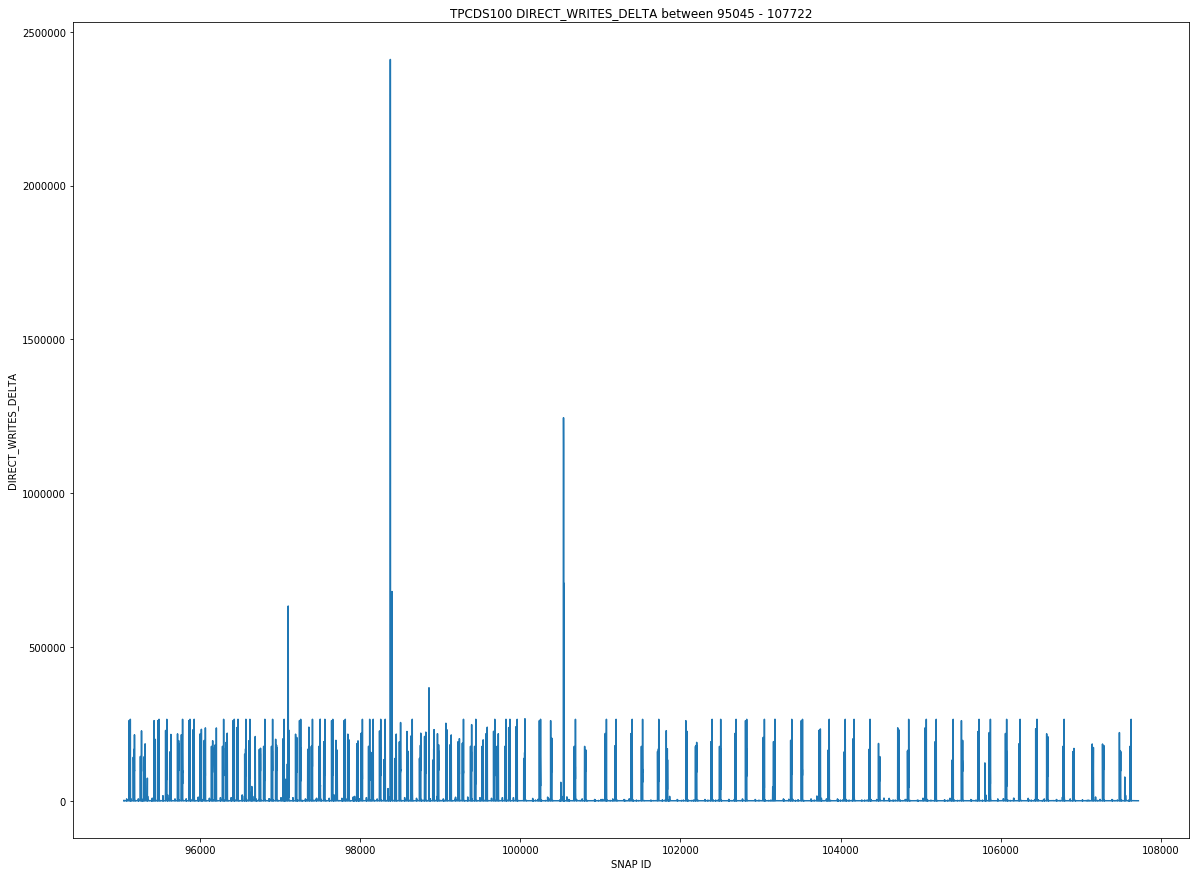

In [31]:
ssv.plot_snapshot_distribution(column="DIRECT_WRITES_DELTA")

### PLSExec Time Delta

Delta value of PL/SQL Execution Time

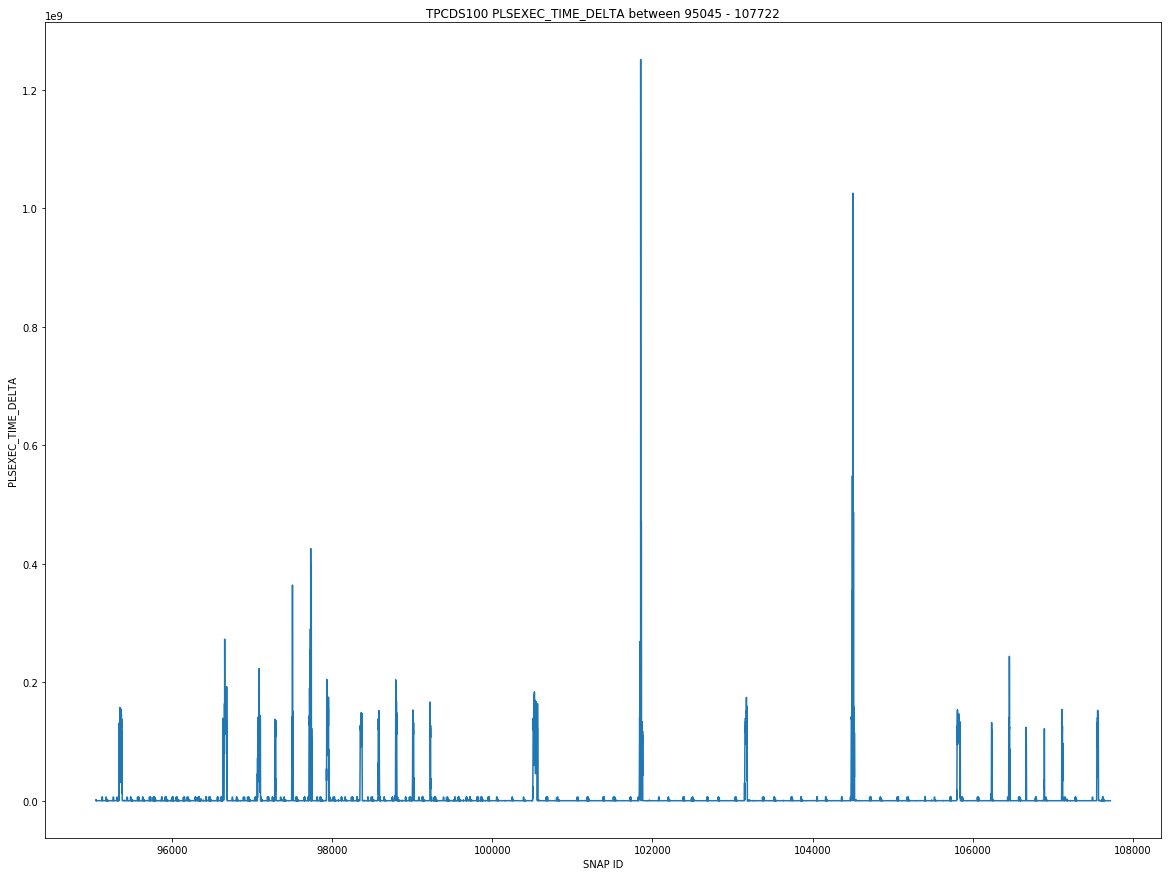

In [32]:
ssv.plot_snapshot_distribution(column="PLSEXEC_TIME_DELTA")

### JavaExec Time Delta

Delta value of Java Execution Time

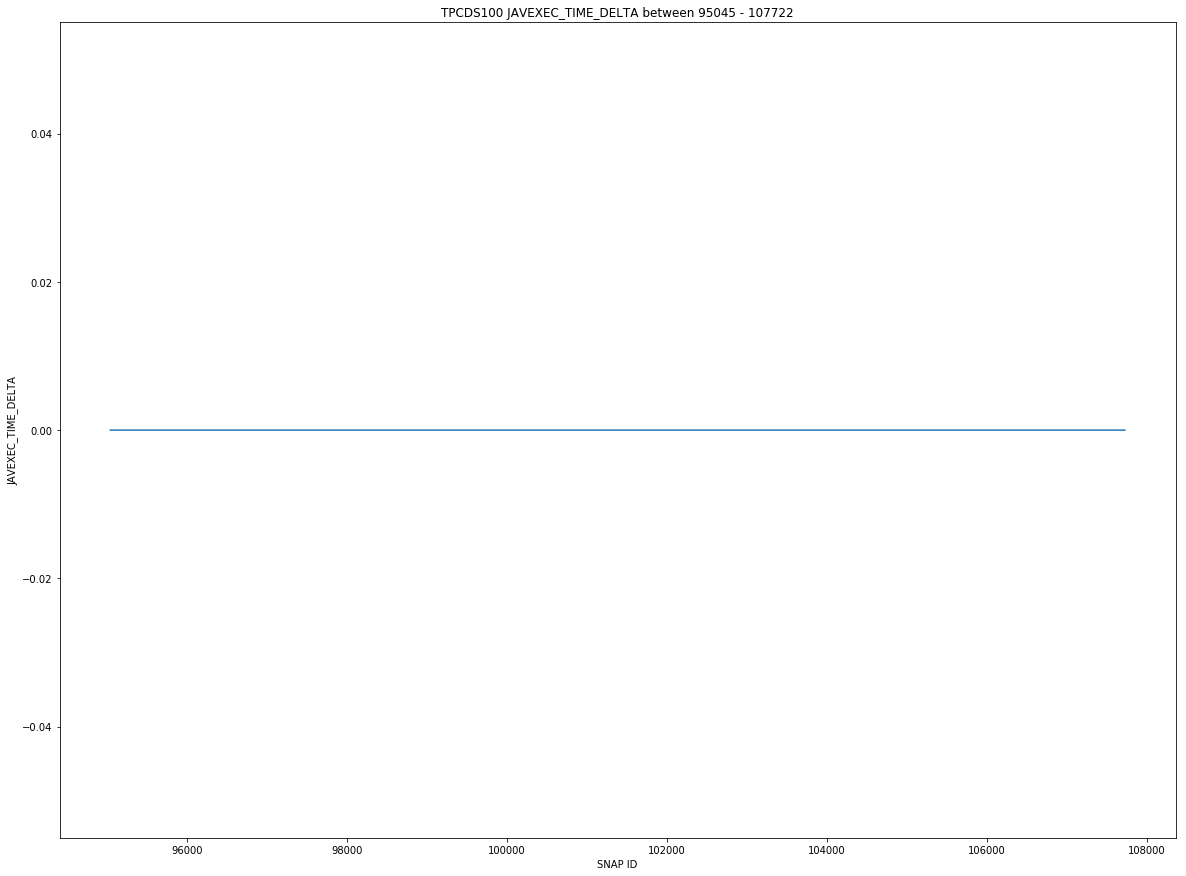

In [33]:
ssv.plot_snapshot_distribution(column="JAVEXEC_TIME_DELTA")